# Battling Kings

In [62]:
# importing dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [63]:
# reading csv file
path="Resources/got.csv"
got_df = pd.read_csv(path)
got_df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [64]:
# getting attacker information, using as_index=False so that the King column is kept
attacker_groupby = got_df.groupby("attacker_king", as_index=False)
attacker_count = attacker_groupby["name"].count()
attacker_count = attacker_count.rename(columns={"attacker_king":"King","name":"Attacker Count"})
attacker_count

,King,Attacker Count
0,Balon/Euron Greyjoy,7
1,Joffrey/Tommen Baratheon,14
2,Robb Stark,10
3,Stannis Baratheon,5


In [65]:
#getting defender information, using as_index=False so that the King column is kept
defender_groupby = got_df.groupby("defender_king", as_index=False)
defender_count = defender_groupby["name"].count()
defender_count = defender_count.rename(columns={"defender_king":"King","name":"Defender Count"})
defender_count.head()

,King,Defender Count
0,Balon/Euron Greyjoy,4
1,Joffrey/Tommen Baratheon,13
2,Mance Rayder,1
3,Renly Baratheon,1
4,Robb Stark,14


In [66]:
# merging the two columns with an outer merge to keep all rows
attacker_defender_df = pd.merge(attacker_count, defender_count, on="King", how="outer")

#replacing NaN with 0
attacker_defender_df = attacker_defender_df.fillna(0)

#creating total battles column
attacker_defender_df["Total Battles"] = attacker_defender_df["Attacker Count"] + attacker_defender_df["Defender Count"]
attacker_defender_df

,King,Attacker Count,Defender Count,Total Battles
0,Balon/Euron Greyjoy,7.0,4,11.0
1,Joffrey/Tommen Baratheon,14.0,13,27.0
2,Robb Stark,10.0,14,24.0
3,Stannis Baratheon,5.0,2,7.0
4,Mance Rayder,0.0,1,1.0
5,Renly Baratheon,0.0,1,1.0


In [67]:
#creating x_axis for the bar graph
x_axis = np.arange(0, len(attacker_defender_df["Total Battles"]), 1)
tick_locations = [value for value in x_axis]

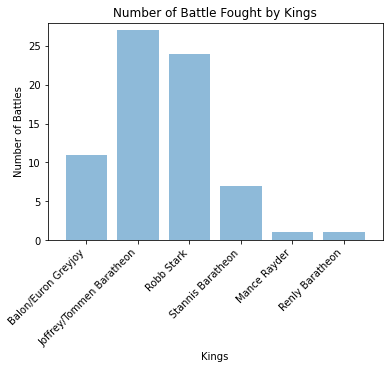

In [73]:
#plotting bar graph and creating tick labels, x/y limits, title and x/y labels
plt.bar(x_axis, attacker_defender_df["Total Battles"], alpha=0.5, align="center")
plt.xticks(tick_locations, attacker_defender_df["King"], rotation=45, ha="right")

plt.xlim(-0.75, len(attacker_defender_df["King"])-0.25)
plt.ylim(0, max(attacker_defender_df["Total Battles"]+1))

plt.title("Number of Battle Fought by Kings")
plt.xlabel("Kings")
plt.ylabel("Number of Battles")

#through this graph, we can see that Joffrey/Tommen Baratheon have fought the most battles
plt.show()

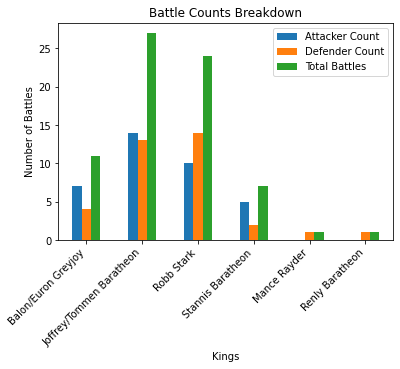

In [74]:
#showing the breakdown of total battles in a multiplot
multi_plot = attacker_defender_df.plot(kind="bar")
multi_plot.set_xticklabels(attacker_defender_df["King"], rotation=45, ha="right")

plt.title("Battle Counts Breakdown")
plt.xlabel("Kings")
plt.ylabel("Number of Battles")

plt.show()